# **ANOMALY DETECTION IN SOCIAL NETWORK**

---




## **Data Sets used :**


---



 
*   facebook : (http://networkrepository.com/socfb-Duke14.php) 


---



## **Mounting Google Drive :**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Importing Packages :**

In [ ]:
import pandas as pd
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.model_selection import train_test_split



---

##**Importing Datasets :**

In [ ]:
d=pd.read_csv('/content/gdrive/My Drive/Project/Dataset/socfb-Duke14.csv')
print(d)

        Source   Destination
0           276            1
1          5326            1
2          6240            1
3          8130            1
4           147            2
...         ...          ...
506432     9881         9850
506433     9859         9851
506434     9870         9854
506435     9882         9860
506436     9872         9871

[506437 rows x 2 columns]



---


## **Creating Graph Object :**

In [ ]:
# Read in the nodelist file
with open('/content/gdrive/My Drive/Project/Dataset/socfb-Duke14_nodes.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

# Get a list of just the node names (the first item in each row)
node_names = [n[0] for n in nodes]

# Read in the edgelist file
with open('/content/gdrive/My Drive/Project/Dataset/socfb-Duke14.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

# Print the number of nodes and edges in our two lists
print(len(node_names))
print(len(edges))

G = nx.Graph() # Initialize a Graph object

G.add_nodes_from(node_names) # Add nodes to the Graph
#G.add_weighted_edges_from(edges)
G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph
print(edges)


9885
506437
Name: 
Type: Graph
Number of nodes: 9885
Number of edges: 506437
Average degree: 102.4658


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




---

## **Data Preprocessing**

### **Removing Self Loops**

In [ ]:
print(nx.info(G))   # Print information about the Graph 
print(G.degree)
G.remove_edges_from(nx.selfloop_edges(G)) 
print(nx.info(G))   # Print information about the Graph(after removing self loops) 
print(G.degree)
node_names= list (G.nodes)

Name: 
Type: Graph
Number of nodes: 9885
Number of edges: 506437
Average degree: 102.4658
[('1', 4), ('2', 132), ('3', 244), ('4', 37), ('5', 226), ('6', 45), ('7', 39), ('8', 61), ('9', 375), ('10', 176), ('11', 34), ('12', 70), ('13', 16), ('14', 132), ('15', 50), ('16', 144), ('17', 13), ('18', 143), ('19', 37), ('20', 20), ('21', 77), ('22', 86), ('23', 12), ('24', 310), ('25', 47), ('26', 455), ('27', 23), ('28', 31), ('29', 91), ('30', 146), ('31', 173), ('32', 128), ('33', 19), ('34', 70), ('35', 156), ('36', 70), ('37', 66), ('38', 32), ('39', 179), ('40', 29), ('41', 258), ('42', 221), ('43', 148), ('44', 33), ('45', 233), ('46', 15), ('47', 371), ('48', 161), ('49', 4), ('50', 112), ('51', 78), ('52', 83), ('53', 135), ('54', 146), ('55', 164), ('56', 136), ('57', 5), ('58', 148), ('59', 12), ('60', 110), ('61', 29), ('62', 147), ('63', 219), ('64', 32), ('65', 6), ('66', 28), ('67', 26), ('68', 146), ('69', 22), ('70', 159), ('71', 24), ('72', 269), ('73', 192), ('74', 148),

### **Removing Lower Degree**

In [ ]:
print(nx.info(G)) # Print information about the Graph
print(G.degree)

g=dict(G.degree)
f=1
while f==1 :
  f=0
  g=dict(G.degree)
  for j in g.keys() :
    if ( g[j]<1 ) :
      G.remove_node(j)
      f=1

print("\n\nAfter Data Preprocessing :\n")    
print(nx.info(G))   # Print information about the Graph(after removing nodes) 
print(G.degree) 
node_names= list (G.nodes)

Name: 
Type: Graph
Number of nodes: 9885
Number of edges: 506437
Average degree: 102.4658
[('1', 4), ('2', 132), ('3', 244), ('4', 37), ('5', 226), ('6', 45), ('7', 39), ('8', 61), ('9', 375), ('10', 176), ('11', 34), ('12', 70), ('13', 16), ('14', 132), ('15', 50), ('16', 144), ('17', 13), ('18', 143), ('19', 37), ('20', 20), ('21', 77), ('22', 86), ('23', 12), ('24', 310), ('25', 47), ('26', 455), ('27', 23), ('28', 31), ('29', 91), ('30', 146), ('31', 173), ('32', 128), ('33', 19), ('34', 70), ('35', 156), ('36', 70), ('37', 66), ('38', 32), ('39', 179), ('40', 29), ('41', 258), ('42', 221), ('43', 148), ('44', 33), ('45', 233), ('46', 15), ('47', 371), ('48', 161), ('49', 4), ('50', 112), ('51', 78), ('52', 83), ('53', 135), ('54', 146), ('55', 164), ('56', 136), ('57', 5), ('58', 148), ('59', 12), ('60', 110), ('61', 29), ('62', 147), ('63', 219), ('64', 32), ('65', 6), ('66', 28), ('67', 26), ('68', 146), ('69', 22), ('70', 159), ('71', 24), ('72', 269), ('73', 192), ('74', 148),

In [ ]:
import pickle
filename = '/content/gdrive/My Drive/Project/Models/graphobjectfb.sav'
pickle.dump(G, open(filename, 'wb'))


## **Egonet Extraction :**


---





In [ ]:
node_names=list (G.nodes)
ego_g={}
for i in node_names :
  ego_g[i] = nx.ego_graph(G, i , radius=1, center=True, undirected=False, distance=None)

In [ ]:
import pickle
filename = '/content/gdrive/My Drive/Project/Models/egonet.sav'
pickle.dump(ego_g, open(filename, 'wb'))

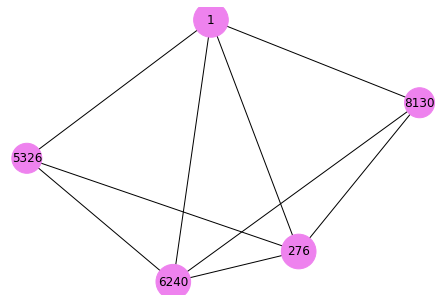

In [ ]:
d = dict(ego_g["1"].degree)
nx.draw(ego_g["1"], node_color='violet', with_labels=True, nodelist=d, node_size=[d[k]*300 for k in d])

## **Graph Metrics :**


---



### **Betweenness Centrality :**

In [ ]:
node_names=list (G.nodes)
for i in node_names :
    bb = nx.betweenness_centrality(ego_g[i],endpoints=False, normalized=False)
    nx.set_node_attributes(ego_g[i], bb, "betweenness")

[0.3333333333333333, 1816.6863989054314, 7005.342465407824, 41.61100619968267, 8986.59420399393, 276.19893341952167, 354.0765873015873, 555.7234942946629, 14520.445783197854, 1653.0919687850126, 407.7055555555556, 891.1394582283898, 94.53333333333335, 5498.5407018437345, 429.72053948180695, 2664.8955113916936, 35.0, 4489.603418359591, 503.8499999999999, 78.27420634920635, 1332.9883713508714, 1657.7190337440343, 38.49999999999999, 18083.13465715179, 521.1163059163058, 65252.52975854118, 90.440873015873, 250.97420634920638, 1797.2923893117547, 5857.229846578357, 5254.131694932957, 2021.2885851405713, 105.19285714285714, 999.3024020097549, 3058.180583516519, 888.6423256553053, 331.0705261016636, 283.7309523809524, 6968.875308271797, 150.67936507936514, 11554.736372040725, 8917.073987098649, 6193.395560804452, 165.61837329337328, 7775.827167615506, 19.613492063492068, 29578.3333371662, 5907.224530468815, 4.0, 1679.3330825294768, 1753.0867507735313, 379.2574050721388, 4844.348630766478, 484

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


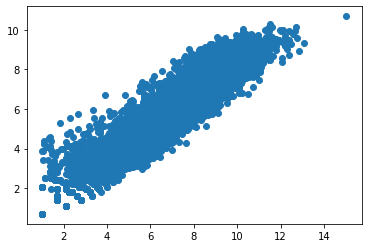

In [ ]:
node_names=list (G.nodes)
def mod(n):
  p=[]
  for i in n:
    if (i<0) :
      p.append (-i+1)
    else:
      p.append (i+1)
  return (p)
  
x1=[]
y=[]
b={}
for i in node_names :
  d=nx.get_node_attributes(ego_g[i], "betweenness")
  s=0
  t=0
  for j in d: 
    s=s+d[j]
    t=t+1
  x1.append(d[i])
  b[i]=d[i]
  #x1.append (s/t)
  y.append (len(ego_g[i].edges))
print(x1)
print(y)

nx.set_node_attributes(G, b, "betweenness")
logx1=mod(np.log(x1))
logy=np.log(y)
plt.scatter(logx1,logy)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")
plt.show()

### **Closeness Centrality**

[0.25, 0.007575757575757576, 0.004098360655737705, 0.02702702702702703, 0.004424778761061947, 0.022222222222222223, 0.02564102564102564, 0.01639344262295082, 0.0026666666666666666, 0.005681818181818182, 0.029411764705882353, 0.014285714285714285, 0.0625, 0.007575757575757576, 0.02, 0.006944444444444444, 0.07692307692307693, 0.006993006993006993, 0.02702702702702703, 0.05, 0.012987012987012988, 0.011627906976744186, 0.08333333333333333, 0.0032258064516129032, 0.02127659574468085, 0.002197802197802198, 0.043478260869565216, 0.03225806451612903, 0.01098901098901099, 0.00684931506849315, 0.005780346820809248, 0.0078125, 0.05263157894736842, 0.014285714285714285, 0.00641025641025641, 0.014285714285714285, 0.015151515151515152, 0.03125, 0.00558659217877095, 0.034482758620689655, 0.003875968992248062, 0.004524886877828055, 0.006756756756756757, 0.030303030303030304, 0.004291845493562232, 0.06666666666666667, 0.0026954177897574125, 0.006211180124223602, 0.25, 0.008928571428571428, 0.0128205128

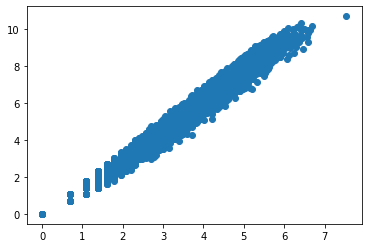

In [ ]:
node_names=list (G.nodes)

x2=[]
y=[]
cc={}
for i in node_names :
  k=ego_g[i].degree(i)
  x2.append(1/k)
  y.append (len(ego_g[i].edges))
  cc[i]=1/k

nx.set_node_attributes(G, cc, "closeness") 
print(x2)
print(y)

logx2=-np.log(x2)
logy=np.log(y)

plt.scatter(logx2,logy)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness Centrality")
plt.ylabel("No. of Edges")
plt.show()

### **Brokerage :**

[1, 6511, 23980, 314, 21863, 654, 592, 1337, 59233, 10651, 474, 1861, 102, 7507, 618, 8253, 54, 8418, 583, 115, 2429, 3166, 48, 41675, 846, 98390, 167, 367, 3332, 9265, 12037, 6293, 125, 1888, 9577, 1901, 1214, 396, 13287, 291, 28599, 20860, 9597, 362, 20760, 53, 62448, 10861, 4, 4766, 2542, 1930, 7847, 9158, 10021, 7959, 9, 8992, 55, 4741, 237, 8221, 21599, 403, 11, 310, 233, 8195, 191, 10324, 221, 28993, 16018, 8598, 11205, 300, 14180, 36875, 1133, 25443, 4258, 24033, 157, 12506, 38577, 27212, 14984, 2393, 3627, 9810, 508, 5310, 6233, 9994, 649, 0, 7388, 76, 1435, 1568, 418, 1594, 0, 7593, 5, 3160, 792, 262, 20843, 5, 3669, 449, 6287, 33, 15973, 31958, 8525, 18519, 7111, 146, 1, 855, 5524, 176, 25, 4846, 4010, 22796, 2802, 8461, 1339, 7546, 6224, 11715, 3669, 2390, 4767, 7563, 48803, 6454, 26555, 1697, 12401, 5994, 10581, 8867, 10779, 406, 2814, 37, 3, 64, 4718, 17820, 68263, 1, 1, 5299, 59194, 7419, 1427, 13793, 5, 249, 226, 0, 1295, 9019, 2251, 1, 5636, 7928, 1345, 683, 37, 4441, 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


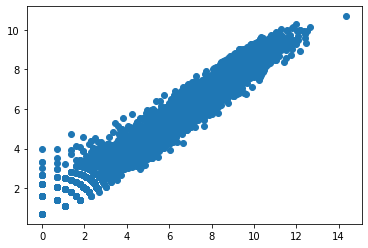

In [ ]:
def facsum(n):
  s=0
  for i in range(n):
    s=s+i
  return s
x3=[]
y=[]
br={}
for i in node_names:
  d=ego_g[i].degree(i)
  e=len(ego_g[i].edges)
  f=facsum(d)
  f=f-(e-d)
  x3.append(f)
  y.append(e)
  br[i]=f
print(x3)
print(y)

nx.set_node_attributes(G, br, "brokerage")

logx3=np.log(x3)
logy=np.log(y)

plt.scatter(logx3,logy)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")
plt.show()

In [ ]:
import pickle
filename = '/content/gdrive/My Drive/Project/Models/graphobjectfb.sav'
pickle.dump(G, open(filename, 'wb'))

## **Splitting Dataset into Training & Testing :**


---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


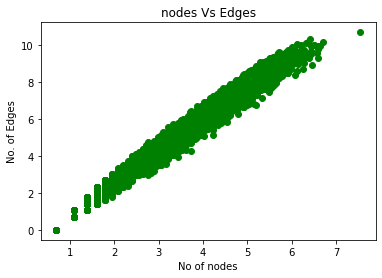

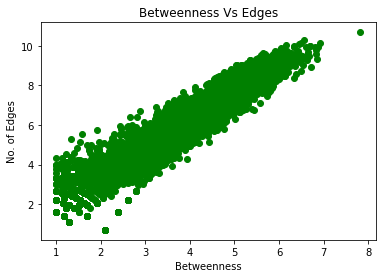

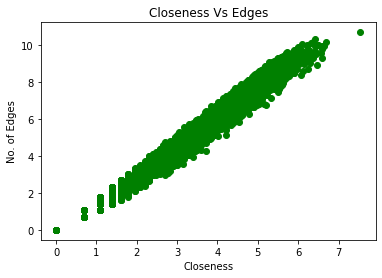

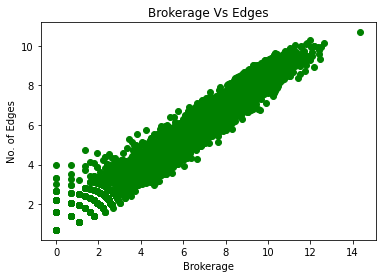

In [ ]:
node_names=list (G.nodes)

def mod(n):
  p=[]
  for i in n:
    if (i<0) :
      p.append (-i+1)
    else:
      p.append (i+1)
  return (p)

y=[]
x=[]
x1=[]
x2=[]
x3=[]
d3=nx.get_node_attributes(G, "brokerage")
d2=nx.get_node_attributes(G, "closeness")

for i in node_names :
  d1=nx.get_node_attributes(ego_g[i], "betweenness")
  s=0
  t=0
  for j in d1: 
    s=s+d1[j]
    t=t+1
  x.append (len(ego_g[i].nodes))
  x1.append (s/t)
  #x1.append(d1[i])
  k=ego_g[i].degree(i)
  x2.append(d2[i])
  x3.append (d3[i])
  y.append (len(ego_g[i].edges))

logx=np.log(x)
logx1=mod(np.log(x1))
logx2=-np.log(x2)
logx3=np.log(x3)
logy=np.log(y)

plt.scatter(logx, logy,color='g',marker='o')
plt.title("nodes Vs Edges")
plt.xlabel("No of nodes")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx1, logy,color='g',marker='o')
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx2, logy,color='g',marker='o')
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx3, logy,color='g',marker='o')
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")
plt.show()




Node : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '

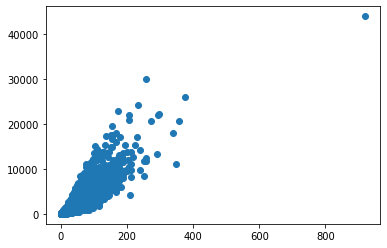

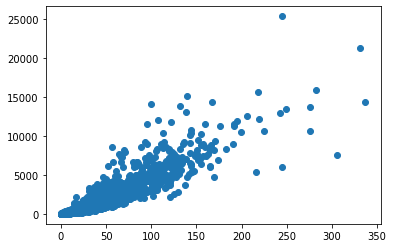

X2_train:  [0.0072992700729927005, 0.04, 0.003484320557491289, 0.058823529411764705, 0.012658227848101266, 0.0078125, 0.0048543689320388345, 0.017543859649122806, 0.02857142857142857, 0.01020408163265306, 0.0029411764705882353, 0.03125, 0.008403361344537815, 0.011111111111111112, 0.00909090909090909, 1.0, 0.008547008547008548, 0.021739130434782608, 0.014925373134328358, 0.08333333333333333, 0.007874015748031496, 0.037037037037037035, 0.3333333333333333, 0.0037174721189591076, 0.006172839506172839, 0.005555555555555556, 0.009708737864077669, 0.030303030303030304, 0.0048543689320388345, 0.012345679012345678, 0.02857142857142857, 0.006289308176100629, 0.034482758620689655, 0.007751937984496124, 0.00819672131147541, 0.012345679012345678, 0.004545454545454545, 0.006329113924050633, 0.004405286343612335, 0.014492753623188406, 0.012987012987012988, 0.022727272727272728, 0.3333333333333333, 0.02857142857142857, 0.016129032258064516, 0.005649717514124294, 0.058823529411764705, 0.25, 0.005988023

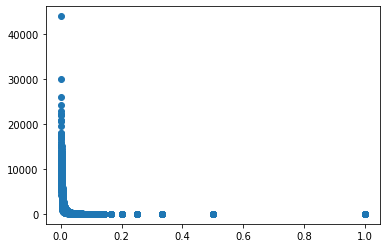

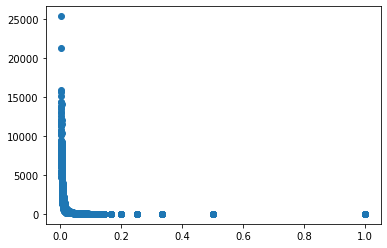

X3_train:  [7798, 219, 34970, 86, 2295, 6550, 17315, 1144, 400, 2910, 49932, 398, 5619, 3361, 3980, 0, 5866, 592, 1665, 39, 6487, 299, 0, 31226, 10242, 13553, 4426, 399, 18265, 2666, 445, 9729, 358, 6082, 5315, 2707, 21277, 9495, 19961, 1865, 2299, 775, 1, 490, 1429, 10374, 90, 5, 12092, 44, 3720, 62, 2852, 3127, 7203, 4781, 2921, 16978, 294, 1592, 815, 1572, 647, 0, 4790, 77, 3696, 271, 4290, 2143, 67, 965, 1427, 4630, 4528, 338, 9154, 682, 45, 286, 1490, 7604, 232, 5661, 14851, 1841, 97, 47, 12923, 6069, 418, 179, 8, 6283, 0, 872, 413, 23898, 4634, 4187, 17, 7083, 6230, 504, 7022, 6209, 8972, 4389, 11703, 10, 15875, 4074, 33033, 35044, 1699, 860, 874, 5255, 175, 2112, 107, 855, 332, 2981, 69, 4741, 15070, 4606, 16441, 1426, 972, 461, 2809, 3431, 3543, 383, 9766, 13, 958, 1450, 198, 584, 1724, 10, 11311, 2746, 21751, 27384, 15939, 2684, 8853, 19537, 433, 154, 7633, 2515, 3988, 18, 5448, 375, 31404, 39351, 18842, 19, 8757, 1149, 42, 56, 3170, 0, 2643, 508, 3, 15860, 6388, 284, 2618, 15

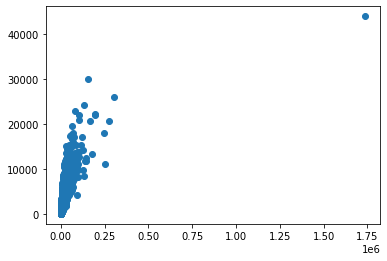

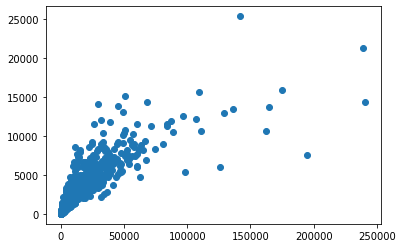

      betweenness  closeness  brokerage  edges
0       56.507246   0.007299       7798   1655
1        8.423077   0.040000        219    106
2      121.423611   0.003484      34970   6358
3        4.777778   0.058824         86     67
4       28.687500   0.012658       2295    865
...           ...        ...        ...    ...
7903    57.850000   0.007194       8099   1631
7904     8.529412   0.030303        290    271
7905     1.666667   0.200000         10      5
7906    52.664179   0.007519       7057   1854
7907     1.000000   0.111111         10     35

[7908 rows x 4 columns]
      betweenness  closeness  brokerage  edges
0        4.214286   0.076923         59     32
1        6.000000   0.058824        108     45
2      101.817778   0.004464      22909   2291
3       11.513514   0.027778        426    240
4        8.304348   0.045455        191     62
...           ...        ...        ...    ...
1972    46.685039   0.007937       5929   2072
1973    60.256098   0.006135       

In [ ]:
print("Node :",node_names)
print("Node :",x)
print("Betweenness :",x1)
print("Closeness :",x2)
print("Brokerage :",x3)
print("Edges :",y)

ddd = pd.DataFrame(list (zip(node_names,x,x1,x2,x3,y)),columns =['nodes_name','nodes','betweenness','closeness','brokerage', 'edges'])
print(ddd)
ddd.to_csv(r'/content/gdrive/My Drive/Project/Dataset/final_dataset1.csv', index = False)

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X1_train: ", X1_train)
print("y1_train: ", y1_train)
print("X1_test: ", X1_test)
print("y1_test: ", y1_test)
plt.scatter(X1_train,y1_train)
plt.show()
plt.scatter(X1_test,y1_test)
plt.show()

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X2_train: ", X2_train)
print("y2_train: ", y2_train)
print("X2_test: ", X2_test)
print("y2_test: ", y2_test)
plt.scatter(X2_train,y2_train)
plt.show()
plt.scatter(X2_test,y2_test)
plt.show()

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X3_train: ", X3_train)
print("y3_train: ", y3_train)
print("X3_test: ", X3_test)
print("y3_test: ", y3_test)
plt.scatter(X3_train,y3_train)
plt.show()
plt.scatter(X3_test,y3_test)
plt.show()
df = pd.DataFrame(list (zip(X1_train,X2_train,X3_train,y1_train)),columns =['betweenness','closeness','brokerage', 'edges'])
print(df)
dftt=pd.DataFrame(list (zip(X1_test,X2_test,X3_test,y1_test)),columns =['betweenness','closeness','brokerage', 'edges'])
print(dftt)
df.to_csv(r'/content/gdrive/My Drive/Project/Dataset/train_dataset.csv', index = False)
dftt.to_csv(r'/content/gdrive/My Drive/Project/Dataset/test_dataset.csv', index = False)
